In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow.keras

In [ ]:
train = pd.read_csv("./sample_data/mnist_train_small.csv")
test = pd.read_csv("./sample_data/mnist_test.csv")

In [ ]:
Y = train["6"]
X = train.drop(columns=["6"])

In [ ]:
X_transformed = X.to_numpy().reshape(X.shape[0],28,28)

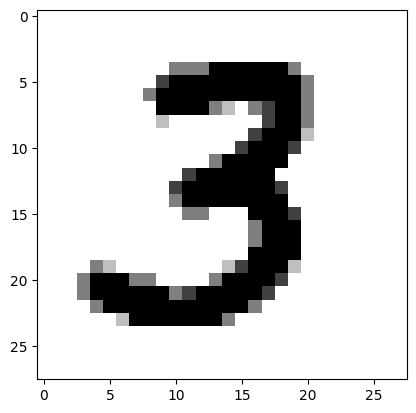

In [ ]:
plt.imshow(x_train[0],cmap="binary")

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X_transformed,Y,test_size=0.2)

In [ ]:
x_train = x_train /255.0
x_test = x_test /255.0

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=[28, 28]),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10,activation="softmax")
])

In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 128)               100480    
                                                                 
 dense_13 (Dense)            (None, 128)               16512     
                                                                 
 dense_14 (Dense)            (None, 10)                1290      
                                                                 
Total params: 118282 (462.04 KB)
Trainable params: 118282 (462.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history = model.fit(x_train,y_train,epochs=30,validation_data=(x_test,y_test),verbose=0)

/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


In [ ]:
train_history_dict = history.history
df = pd.DataFrame(train_history_dict)

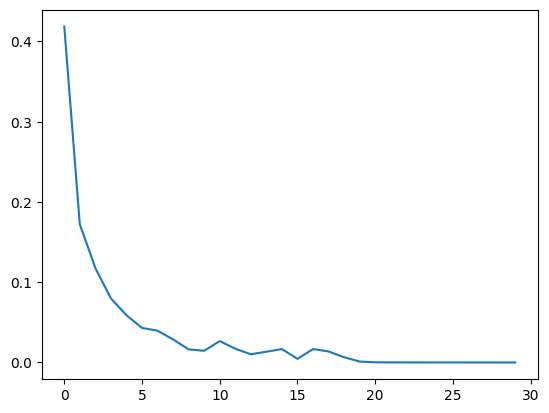

In [ ]:
plt.plot(df["loss"])

In [ ]:
Test = test.drop(columns=["7"]).to_numpy().reshape(test.shape[0],28,28)

In [ ]:
preds = model.predict(Test)

313/313 [==============================] - 0s 1ms/step


In [ ]:
r = np.argmax(preds,axis=1)

In [ ]:
(r == test["7"].to_numpy()).any()

True